**Data Collection & Loading**

In [1]:
!pip install --upgrade pip
!pip install tensorflow
!pip install tensorflow-gpu
!pip install opencv-python
!pip install matplotlib
!pip install --upgrade setuptools
import tensorflow as tf
import os


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Data Preperation (Removing Dodgy Images)

In [3]:
import cv2
import imghdr


In [4]:
data_dir = '/content/drive/MyDrive/Dataset_Metal/Dataset'

In [5]:
data_dir

'/content/drive/MyDrive/Dataset_Metal/Dataset'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Dataset_Metal/Dataset')

Found 322 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

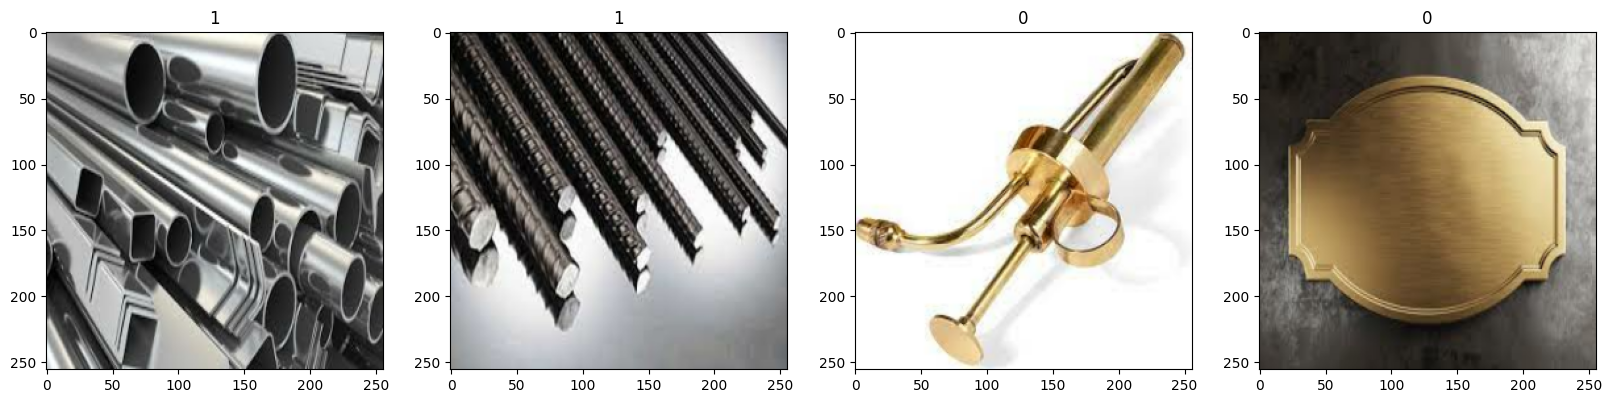

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.31764707, 0.27058825, 0.20784314],
          [0.31721047, 0.27015164, 0.20740655],
          [0.31227022, 0.2652114 , 0.2024663 ],
          ...,
          [0.18342525, 0.17238818, 0.14129902],
          [0.18867187, 0.17690717, 0.14945619],
          [0.1882353 , 0.1764706 , 0.14901961]],
 
         [[0.34703597, 0.29997715, 0.23723204],
          [0.34391156, 0.29685274, 0.23410764],
          [0.3345211 , 0.2874623 , 0.2247172 ],
          ...,
          [0.15514335, 0.14410628, 0.10932413],
          [0.15642688, 0.14466217, 0.1167064 ],
          [0.15867813, 0.14691341, 0.11946244]],
 
         [[0.3742598 , 0.32720098, 0.26445588],
          [0.368053  , 0.32099417, 0.25824907],
          [0.35519913, 0.3081403 , 0.2453952 ],
          ...,
          [0.14485127, 0.1338142 , 0.09633717],
          [0.14453891, 0.1327742 , 0.10445006],
          [0.14875153, 0.13698682, 0.10953584]],
 
         ...,
 
         [[0.44949797, 0.39459598, 0.29128227],
          [0.36702

**Data Splitting**

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Model Building & Training**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
history = model.fit(train, epochs=30, validation_data=val)


Epoch 1/30
7/7 [==============================] - 8s 212ms/step - loss: 1.1548 - accuracy: 0.5268 - val_loss: 0.6760 - val_accuracy: 0.6094
Epoch 2/30
7/7 [==============================] - 4s 481ms/step - loss: 0.6847 - accuracy: 0.5536 - val_loss: 0.6739 - val_accuracy: 0.7969
Epoch 3/30
7/7 [==============================] - 2s 207ms/step - loss: 0.6437 - accuracy: 0.6429 - val_loss: 0.6175 - val_accuracy: 0.6094
Epoch 4/30
7/7 [==============================] - 2s 268ms/step - loss: 0.5614 - accuracy: 0.6741 - val_loss: 0.4736 - val_accuracy: 0.7656
Epoch 5/30
7/7 [==============================] - 2s 266ms/step - loss: 0.4355 - accuracy: 0.8125 - val_loss: 0.3000 - val_accuracy: 0.8438
Epoch 6/30
7/7 [==============================] - 2s 264ms/step - loss: 0.3760 - accuracy: 0.8393 - val_loss: 0.3611 - val_accuracy: 0.8438
Epoch 7/30
7/7 [==============================] - 3s 288ms/step - loss: 0.3311 - accuracy: 0.8482 - val_loss: 0.4020 - val_accuracy: 0.7969
Epoch 8/30
7/7 [====

**Data Validation**

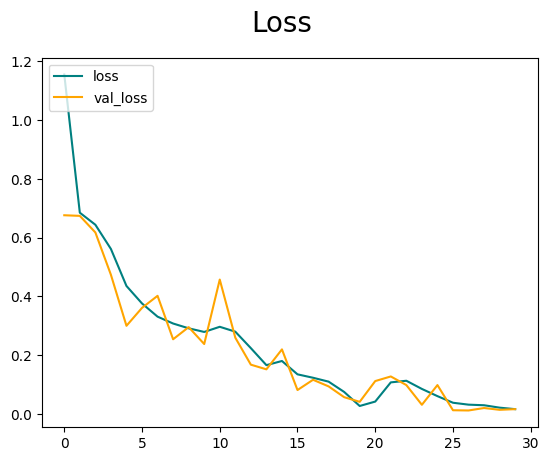

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [29]:
test_loss, test_acc = model.evaluate(test)
print(f'Test accuracy: {test_acc}')

1/1 [==============================] - 1s 1s/step - loss: 0.0017 - accuracy: 1.0000
Test accuracy: 1.0


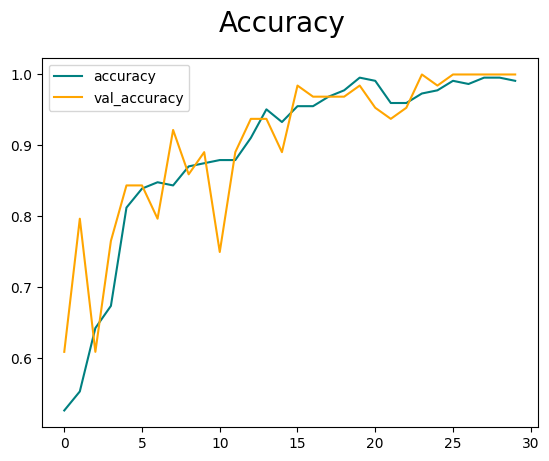

In [32]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 134ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


**Testing**

In [37]:
import cv2

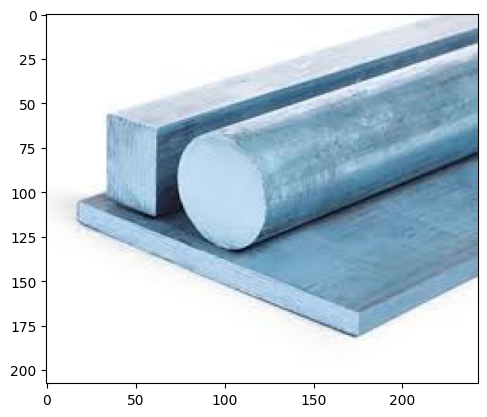

In [39]:
img = cv2.imread('/content/drive/MyDrive/Dataset_Metal/Dataset/Copper_Brass/12.jpeg')
plt.imshow(img)
plt.show()


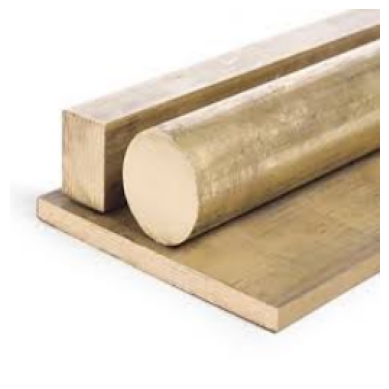

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(resize.numpy().astype('uint8'), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()


In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 345ms/step


In [42]:
if yhat > 0.5:
    print(f'Detected class is Copper/Brass')
else:
    print(f'Detected class is Steel/Other')

Detected class is Copper/Brass
